> # Importing libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

2026-02-18 15:14:02.598419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771427642.845350      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771427642.912777      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771427643.501317      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771427643.501371      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771427643.501374      55 computation_placer.cc:177] computation placer alr

> # Loading cifar10 data 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


> # Normalizing data
 

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

> # Visualize 

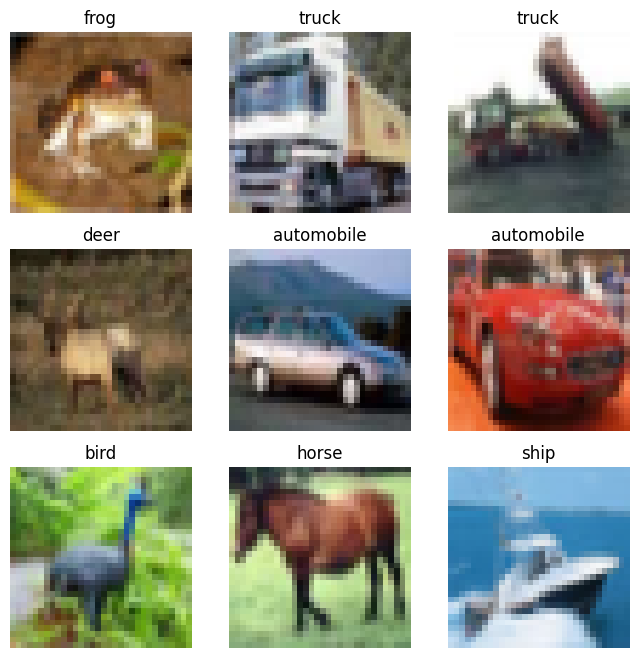

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

> # Augmentation
 

In [6]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

2026-02-18 15:14:44.502749: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


> # Architecture 

In [7]:
model = keras.Sequential([
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> # Compile 

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


> # Train 

In [9]:
history = model.fit(x_train,y_train,epochs=25,
                    validation_data=(x_test,y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 45ms/step - accuracy: 0.3532 - loss: 1.8902 - val_accuracy: 0.4967 - val_loss: 1.3956
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4978 - loss: 1.4247 - val_accuracy: 0.5090 - val_loss: 1.4033
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5402 - loss: 1.3134 - val_accuracy: 0.5647 - val_loss: 1.2240
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5702 - loss: 1.2260 - val_accuracy: 0.5742 - val_loss: 1.2207
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5905 - loss: 1.1718 - val_accuracy: 0.6359 - val_loss: 1.0326
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6107 - loss: 1.1171 - val_accuracy: 0.6067 - val_loss: 1.1447
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6288 - loss: 1.0696 - val_accuracy: 0.6497 - val_loss: 1.0115
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6402 -

> # Evaluate 

In [10]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7384 - loss: 0.7716
Accuracy: 0.7348999977111816


In [11]:
predictions = model.predict(x_test)

for i in range(5):
    print("Predicted:", class_names[np.argmax(predictions[i])],
          "| Actual:", class_names[y_test[i][0]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted: cat | Actual: cat
Predicted: ship | Actual: ship
Predicted: ship | Actual: ship
Predicted: airplane | Actual: airplane
Predicted: frog | Actual: frog


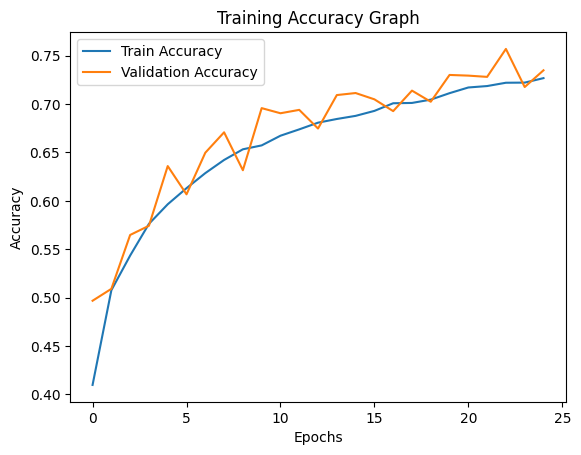

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()